In [49]:
import os
import json
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from operator import is_not
from functools import partial
import math
import re
#load our cutomized data load module
import loaddata


%matplotlib inline

In [64]:
#this code read files under two folder and merge them together into one data frame
#1 Read mojo files
mojo_data = loaddata.load_mojo_data()
mojo_df = pd.DataFrame(mojo_data)
mojo_df['title_clean'] = mojo_df['title'].str.replace('[^\w]','').str.lower()
#2 Read meta files
meta_data = loaddata.load_metacritic_data()
meta_df = pd.DataFrame(meta_data)
meta_df['title_clean'] = meta_df['title'].str.replace('[^\w]','').str.lower()
#3 Merge two file together
df_merged = pd.merge(mojo_df, 
                     meta_df,
                     on=['title_clean','year'],
                     how = 'left')
# check the final data frame
df_merged.head()

Parsed 3728 movies from 3728 files
Parsed 4765 metacritic files from 4767 files


,alt_title,director_x,domestic_gross,mojo_slug,opening_per_theater,opening_weekend_take,production_budget,release_date_limited,release_date_wide,title_x,...,num_critic_reviews,num_user_ratings,num_user_reviews,rating,release_date,runtime_minutes,studio,title_y,unable to retrieve,user_score
0,"10,000 B.C. (2008)",Roland Emmerich,94784201.0,10000bc,10518.0,35867488.0,105000000.0,None,2008-03-07,"10,000 B.C.",...,"4, 8, 17, 29",273.0,"50, 18, 60, 128",PG-13,2008-03-07,109.0,Warner Bros. Pictures,"10,000 BC",NaN,4.6
1,102 Dalmatians (2000),None,66957026.0,102dalmatians,7353.0,19883351.0,85000000.0,None,2000-11-22,102 Dalmatians,...,"7, 5, 12, 24",47.0,"7, 3, 3, 13",G,2000-11-22,100.0,Buena Vista Pictures,102 Dalmatians,NaN,5.3
2,10 Things I Hate About You (1999),None,38178166.0,10thingsihateaboutyou,3668.0,8330681.0,30000000.0,None,1999-03-31,10 Things I Hate About You,...,"18, 7, 1, 26",175.0,"27, 1, 1, 29",PG-13,1999-03-31,97.0,Buena Vista Pictures,10 Things I Hate About You,NaN,7
3,10 Years (2012),Jamie Linden,203373.0,10years,7569.0,22707.0,NaN,None,2012-09-14,10 Years,...,"7, 11, 0, 18",12.0,"3, 2, 1, 6",R,2012-09-14,100.0,Anchor Bay Entertainment,10 Years,NaN,6.6
4,11 Flowers (2013),None,9213.0,11flowers,1758.0,3516.0,NaN,None,2013-02-22,11 Flowers,...,"4, 3, 0, 7",NaN,"1, 0, 0, 1",Not Rated,2013-02-22,110.0,First Run Features,11 Flowers,NaN,tbd


In [12]:
list(df_merged.columns.values)

[u'alt_title',
 u'director_x',
 u'domestic_gross',
 u'mojo_slug',
 u'opening_per_theater',
 u'opening_weekend_take',
 u'production_budget',
 u'release_date_limited',
 u'release_date_wide',
 u'title_x',
 u'widest_release',
 u'worldwide_gross',
 u'year',
 'title_clean',
 u'complete',
 u'director_y',
 u'genre',
 u'metacritic_page',
 u'metascore',
 u'num_critic_reviews',
 u'num_user_ratings',
 u'num_user_reviews',
 u'rating',
 u'release_date',
 u'runtime_minutes',
 u'studio',
 u'title_y',
 u'unable to retrieve',
 u'user_score']

In [83]:
df_merged['international_gross'] = df_merged.worldwide_gross - df_merged.domestic_gross
df_merged['domestic_margin'] = (df_merged.domestic_gross - df_merged.production_budget) / df_merged.production_budget
df_merged['international_margin'] = (df_merged.international_gross - df_merged.production_budget) / df_merged.production_budget
df_merged['worldwide_margin'] = (df_merged.worldwide_gross - df_merged.production_budget) / df_merged.production_budget
df_recent = df_merged[df_merged['year']>=1988]
df_recent.describe()

,domestic_gross,opening_per_theater,opening_weekend_take,production_budget,widest_release,worldwide_gross,year,metascore,num_user_ratings,runtime_minutes,international_gross,domestic_margin,worldwide_margin,international_margin
count,3.467000e+03,3406.000000,3.406000e+03,1.552000e+03,3449.000000,2.775000e+03,3513.000000,3155.000000,3091.000000,3178.000000,2.767000e+03,1550.000000,1452.000000,1451.000000
mean,3.515407e+07,7732.735467,9.116982e+06,4.672912e+07,1374.975645,9.030155e+07,2006.263023,57.259271,123.605306,107.205790,4.855564e+07,9.354591,17.084399,6.228771
std,5.647958e+07,8155.260644,1.426801e+07,4.071684e+07,1312.245285,1.485506e+08,6.397807,18.022514,221.464583,19.297771,9.413737e+07,203.936347,362.188010,156.832540
min,7.200000e+01,72.000000,7.200000e+01,2.200000e+02,1.000000,7.200000e+01,1988.000000,1.000000,4.000000,60.000000,0.000000e+00,-0.999926,-0.998543,-1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,7.605076e+08,204230.000000,1.741446e+08,2.150000e+08,4468.000000,2.787965e+09,2015.000000,100.000000,4002.000000,325.000000,2.027457e+09,7193.587333,12889.386667,5694.799333


(0, 200000000)

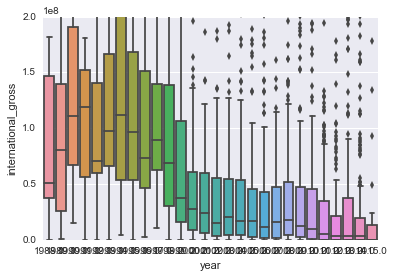

In [90]:
lm = sns.boxplot(x="year", y="international_gross",data=df_recent)
axes = lm.axes
axes.set_ylim(0,200000000)

(0, 200000000)

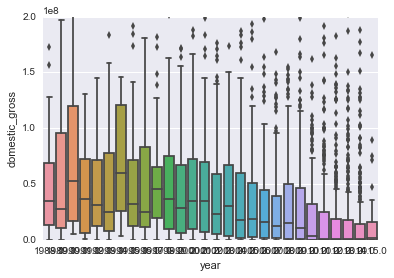

In [91]:
lm = sns.boxplot(x="year", y="domestic_gross",data=df_recent)
axes = lm.axes
axes.set_ylim(0,200000000)

In [106]:
df_cell = df_recent[["domestic_gross","metascore","international_gross","domestic_margin","international_margin","production_budget"]]
df_cell = df_cell.dropna()
df_cell.describe()

# x = df_cell.domestic_gross
# y = df_cell.international_gross
#sizes = df_cell.worldwide_margin

#g = sns.distplot(sizes);

# plt.scatter(x, y, c=sizes, marker='o')
# plt.show()

,domestic_gross,metascore,international_gross,domestic_margin,international_margin,production_budget
count,1.385000e+03,1385.000000,1.385000e+03,1385.000000,1385.000000,1.385000e+03
mean,6.737648e+07,54.227437,7.626500e+07,10.300435,6.498236,4.907426e+07
std,6.880623e+07,17.650127,1.065980e+08,215.706662,160.521068,4.157783e+07
min,1.747900e+04,6.000000,0.000000e+00,-0.998543,-1.000000,2.200000e+02
25%,2.100292e+07,41.000000,1.157648e+07,-0.362725,-0.564286,1.900000e+07
50%,4.711939e+07,54.000000,3.936148e+07,0.243379,0.006148,3.700000e+07
75%,9.392792e+07,67.000000,1.003440e+08,1.270037,1.086819,7.000000e+07
max,6.586723e+08,100.000000,1.528100e+09,7193.587333,5694.799333,2.150000e+08


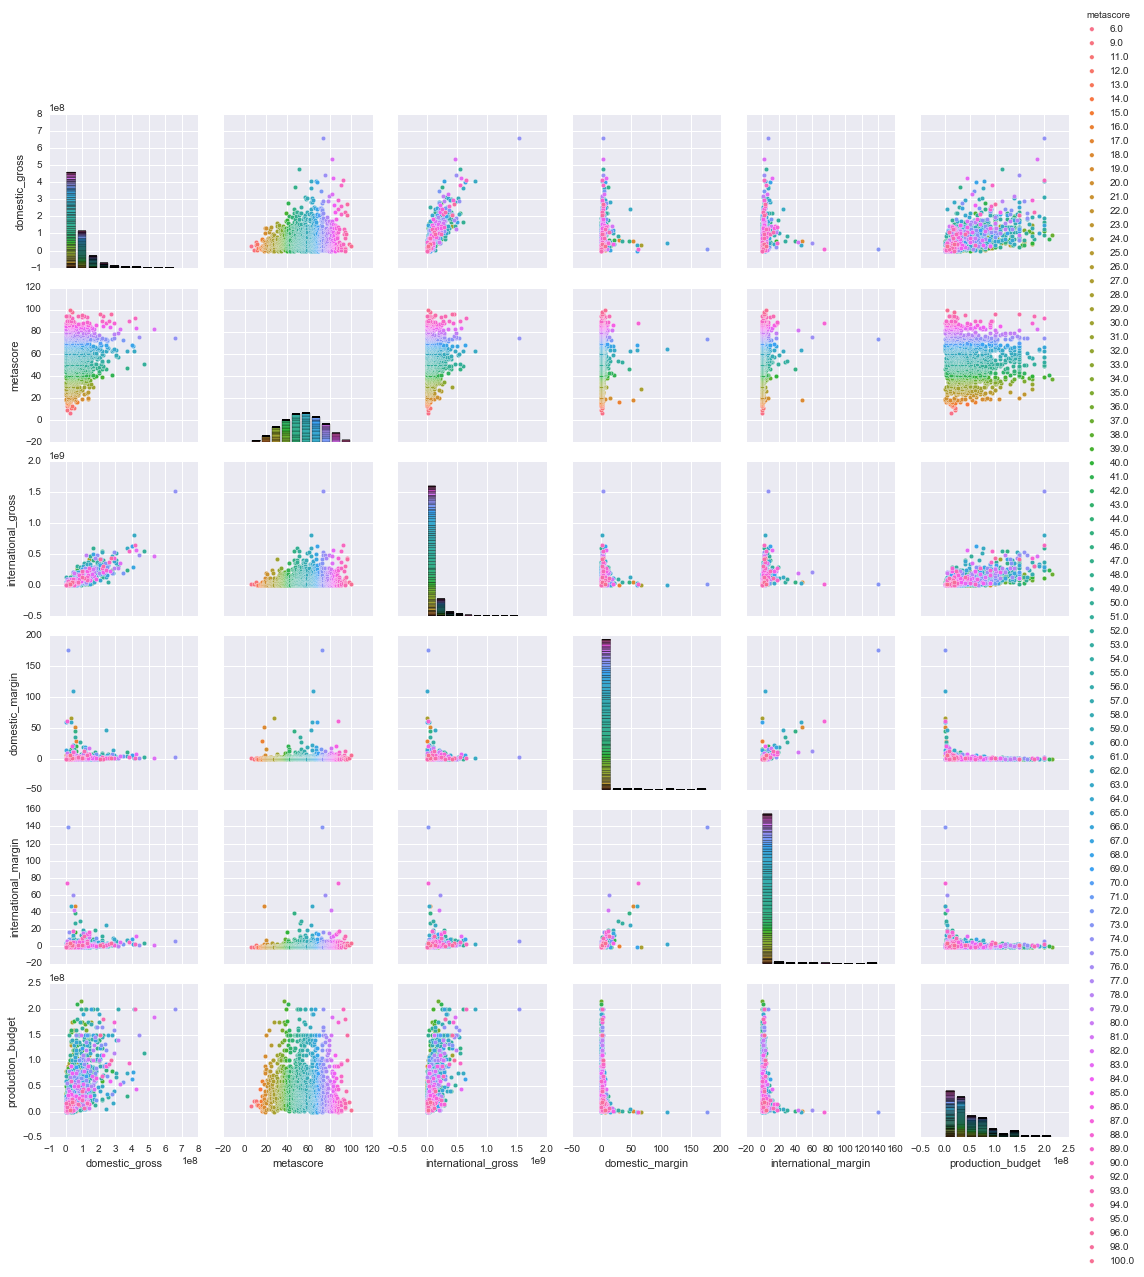

In [97]:
df_margin = df_cell[df_cell.domestic_margin <= 200]
df_margin = df_margin.sort_values(by='domestic_margin', ascending = False)
sns.pairplot(df_margin, hue="metascore")

In [103]:
df_margin.domestic_margin.describe()

count    1382.000000
mean        1.477007
std         7.376733
min        -0.998543
25%        -0.364328
50%         0.241495
75%         1.255697
max       176.483431
Name: domestic_margin, dtype: float64

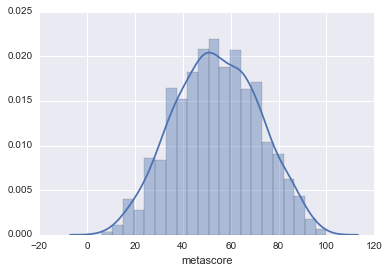

In [111]:
sns.distplot(df_margin.metascore)

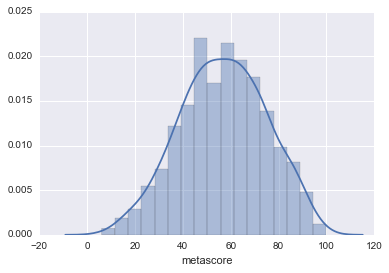

In [124]:
sns.distplot(df_margin[df_margin['domestic_margin']>=.11].metascore)

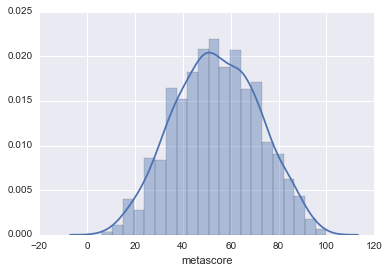

In [116]:
sns.distplot(df_margin[df_margin['domestic_gross']>=0.1].metascore)